In [1]:
import geopandas
import sys
# sys.path.append('../pystare/')
import pystare
import pandas

In [17]:
def divert_stderr():
    sys.stderr = open('stderr.out','w')  
    return

def restore_stderr():
    sys.stderr.close()
    with open('stderr.out') as f:
        count = sum(1 for _ in f)
    if count > 0:
        print(count, 'warnings or errors encountered while stderr diverted. See stderr.out.')
    sys.stderr = sys.__stderr__
    return

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,set_coastlines=True
        ,show=True
        ,color=None
        ,lw=1
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        if set_coastlines:
            figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = pystare.triangulate_indices(spatial_index_values)
        
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        # print('plot type triang: ',type(siv_triang))
        divert_stderr()
        figax.ax.triplot(siv_triang,c=color,transform=plot_options['transform'],lw=lw)
        restore_stderr()
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

def lonlat_from_coords(coords):
    tmp = numpy.array(coords)
    lat=tmp[:,1]
    lon=tmp[:,0]
    return lon,lat

km  = 1 # Unit of length
deg = 1 # Unit of angle

# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

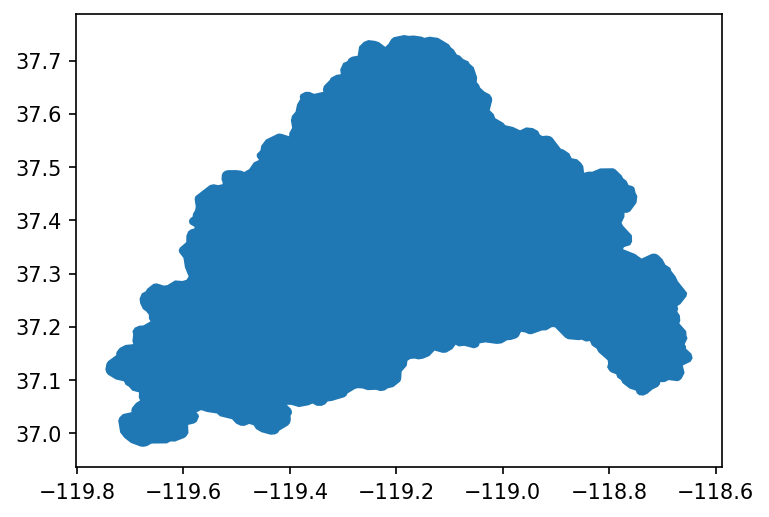

In [3]:
gdf = geopandas.read_file('extras/san_joaquin_simple.gpkg')
geom = gdf.iloc[0].geometry

# we can dump the nodes to a csv with
lon = geom.exterior.xy[0]
lat = geom.exterior.xy[1]
# print('len lon: ',len(lon))
pandas.DataFrame({'lon': lon, 'lat': lat}).to_csv('extras/san_joaquin_simple.csv', header=None, index=None)

gdf.plot()

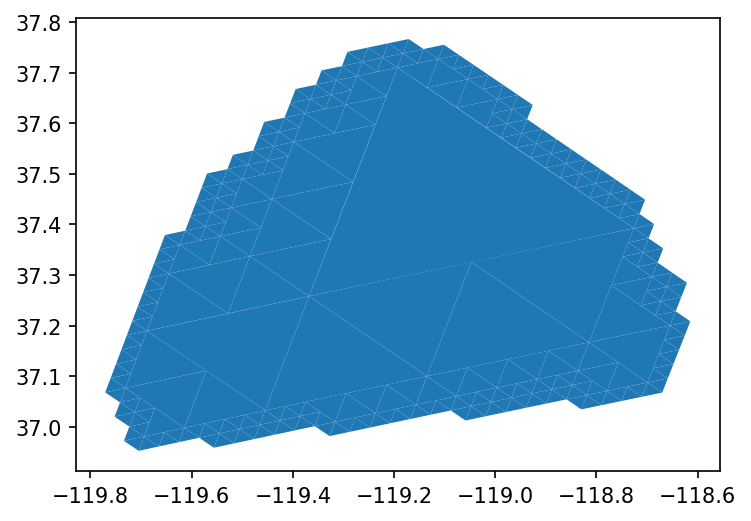

In [4]:
ids = pystare.from_polygon(geom, resolution=12, nonconvex=False)
geoms = pystare.to_trixels(ids)
geopandas.GeoDataFrame({'geom':geoms}).set_geometry('geom').plot()

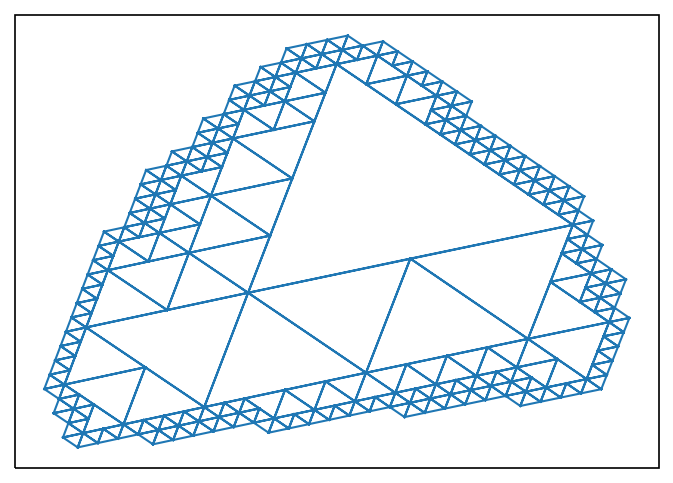

In [5]:
figax=hello_plot(ids)

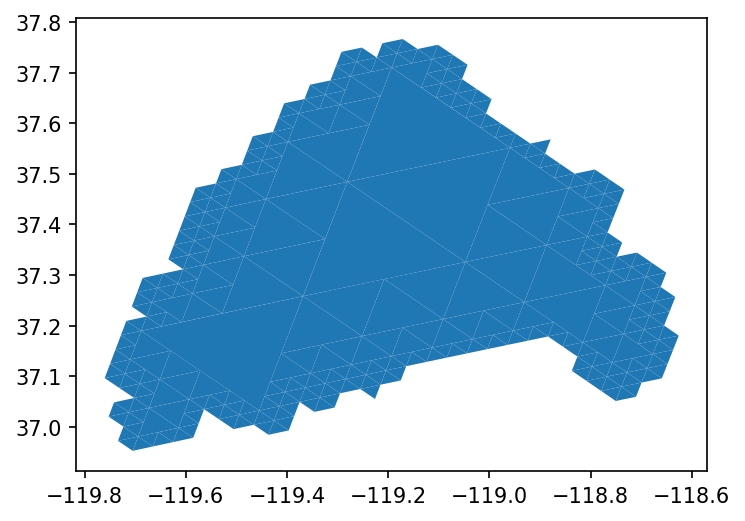

In [6]:
# ids = pystare.from_polygon(s, resolution=12, nonconvex=True)
ids = pystare.from_polygon(geom, resolution=12, nonconvex=True)
geoms = pystare.to_trixels(ids)
geopandas.GeoDataFrame({'geom':geoms}).set_geometry('geom').plot()

In [7]:
type(geom)

shapely.geometry.polygon.Polygon

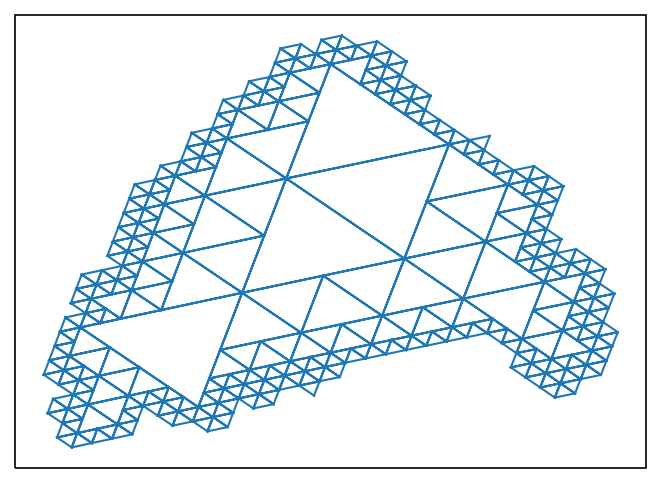

In [8]:
figax=hello_plot(ids)

In [9]:
gdf = geopandas.read_file('extras/san_joaquin.gpkg')
geom = gdf.iloc[0].geometry

lon = geom.exterior.xy[0]
lat = geom.exterior.xy[1]

# print('len lon: ',len(lon))

# for i in range(len(lon)):
#    print(i,hex(pystare.from_latlon([lon[i]],[lon[i]],12)[0]))

In [10]:
ids = pystare.from_polygon(geom, resolution=12, nonconvex=True)

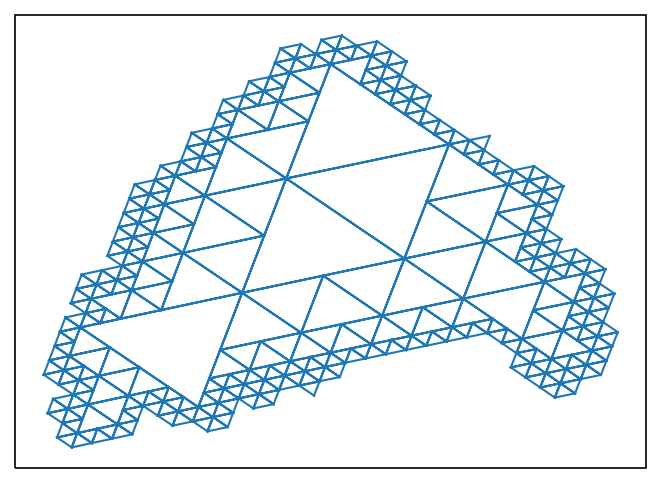

In [11]:
figax=hello_plot(ids)

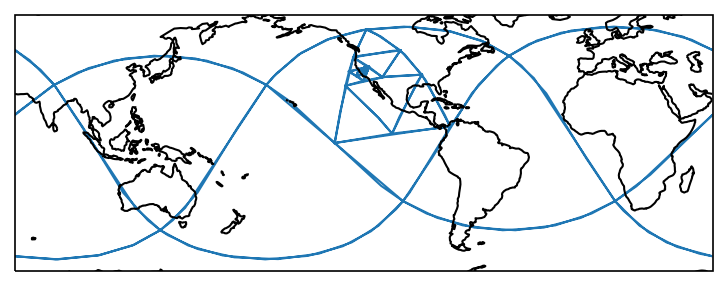

In [30]:
ids = pystare.from_polygon(shapely.geometry.polygon.orient(geom,-1), resolution=12, nonconvex=True)
plot_options['projection']=ccrs.PlateCarree(central_longitude=-120)
figax=hello_plot(ids,plot_options=plot_options)

3806 warnings or errors encountered while stderr diverted. See stderr.out.


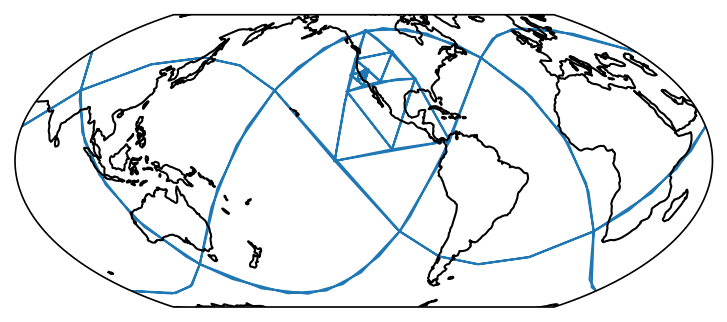

In [23]:
figax=hello_plot(ids,show=False,plot_options={'projection':ccrs.Mollweide(central_longitude=-120),'transform':ccrs.Geodetic()})
# figax.ax.axis((-125,-113,34,40))
plt.show()

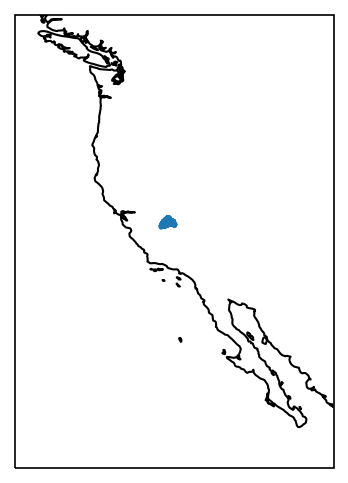

In [47]:
ids = pystare.from_polygon(shapely.geometry.polygon.orient(geom,1), resolution=12, nonconvex=True)
figax=hello_plot(ids,show=False,plot_options={'projection':ccrs.PlateCarree(central_longitude=0),'transform':ccrs.Geodetic()})
# figax.ax.set_global()
# figax.ax.axis((-125,-113,34,40))
figax.ax.axis((-130,-107.5,20,52))
plt.show()

4367 warnings or errors encountered while stderr diverted. See stderr.out.


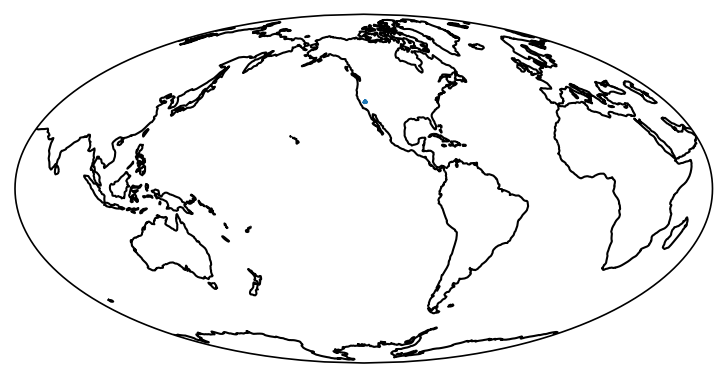

In [40]:
ids = pystare.from_polygon(shapely.geometry.polygon.orient(geom,1), resolution=12, nonconvex=True)
figax=hello_plot(ids,show=False,plot_options={'projection':ccrs.Mollweide(central_longitude=-120),'transform':ccrs.Geodetic()})
figax.ax.set_global()
# figax.ax.axis((-125,-113,34,40))
# figax.ax.axis((-150,-90,0,70))
plt.show()

## The following crashes in convex hull.

In [14]:
# ids = pystare.from_polygon(geom_r, resolution=12, range_size_limit=30000, nonconvex=False)

In [15]:
# figax=hello_plot(ids)

In [16]:
# we can dump the nodes e.g. with
# lon = geom.exterior.xy[0]
# lat = geom.exterior.xy[1]
# pandas.DataFrame({'lon': lon, 'lat': lat}).to_csv('extras/san_joaquin.csv', header=None, index=None)